<a href="https://colab.research.google.com/github/TeddyAbraham/Jamboree/blob/main/Jamboree_(BCS_Ted).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ________________________ **Jamboree**_____________________________

# Problem statement:
To help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves.
It will also help predict one's chances of admission given the rest of the variables.

**Column Profiling:**

* Serial No. (Unique row ID)
* GRE Scores (out of 340)
* TOEFL Scores (out of 120)
* University Rating (out of 5)
* Statement of Purpose and Letter of Recommendation Strength (out of 5)
* Undergraduate GPA (out of 10)
* Research Experience (either 0 or 1)
* Chance of Admit (ranging from 0 to 1)

**Concept Used:**

* Exploratory Data Analysis
* Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
# !gdown 1uveT0UFvf5tWvNd0JK2m7w_HBYWajKg5

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Jamboree_Admission.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# Dropping the unique row
df.drop(['Serial No.'], axis = 1, inplace = True)

In [ ]:
df.shape

(500, 8)

In [ ]:
# Checking for the Null Value if in any column
df.isnull().sum()[df.isnull().sum() > 0]

,0


In [ ]:
# checking for any duplicate
df.duplicated().sum()

0

In [ ]:
df.nunique()

,0
GRE Score,49
TOEFL Score,29
University Rating,5
SOP,9
LOR,9
CGPA,184
Research,2
Chance of Admit,61


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


# Univarient Analysis

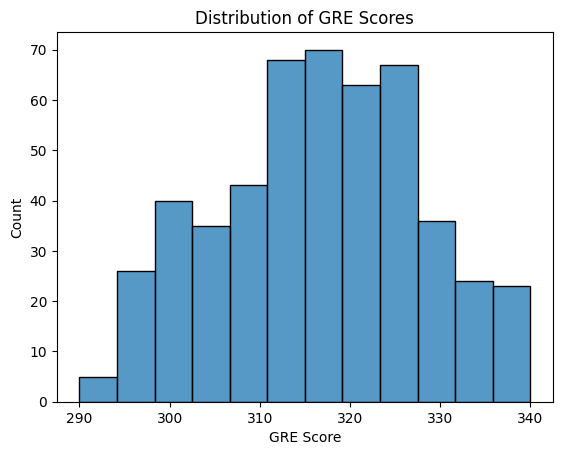

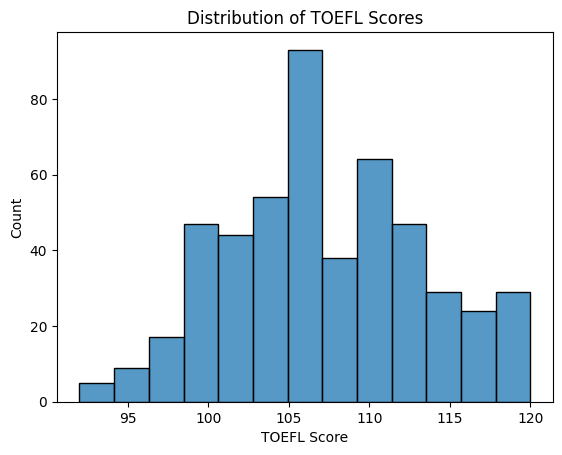

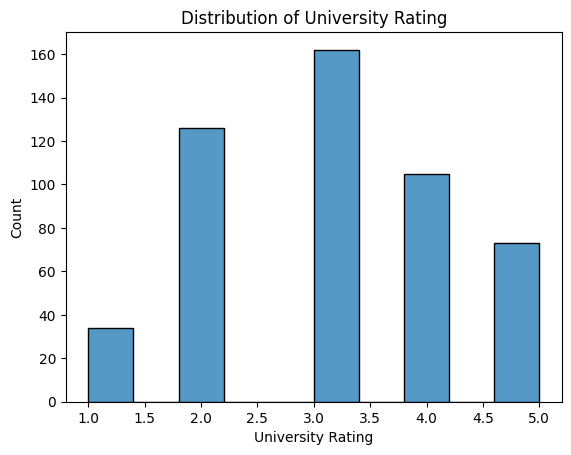

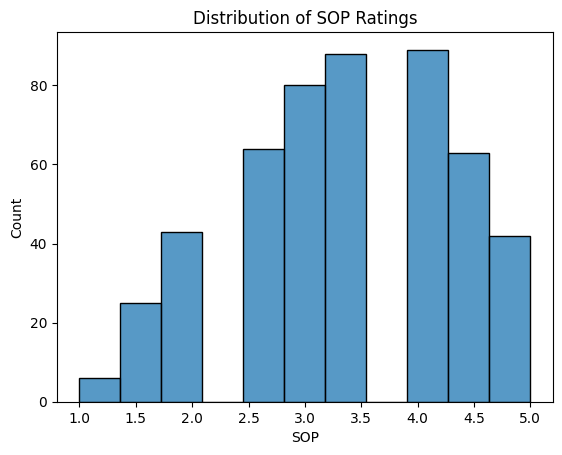

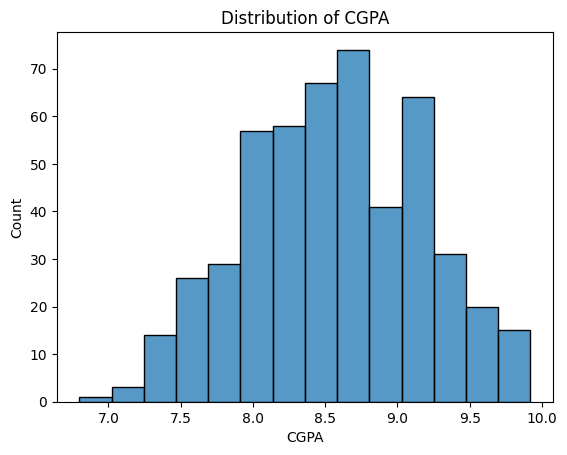

In [ ]:
# GRE Score Distribution
sns.histplot(df['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

# TOEFL Score Distribution
sns.histplot(df['TOEFL Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()

# University Rating Distribution
sns.histplot(df['University Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()

# SOP Rating Distribution
sns.histplot(df['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()

# CGPA Distribution
sns.histplot(df['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()

# Bivarient Analysis

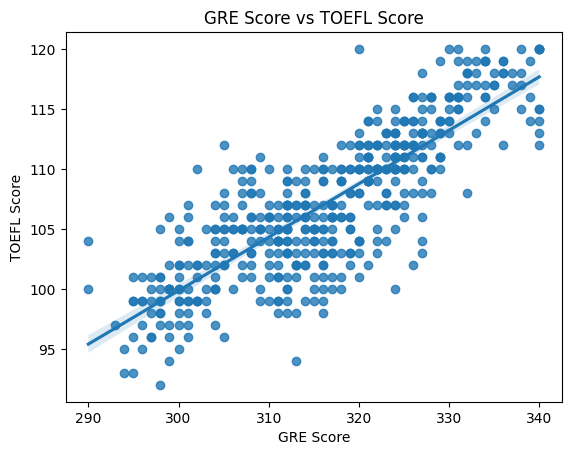

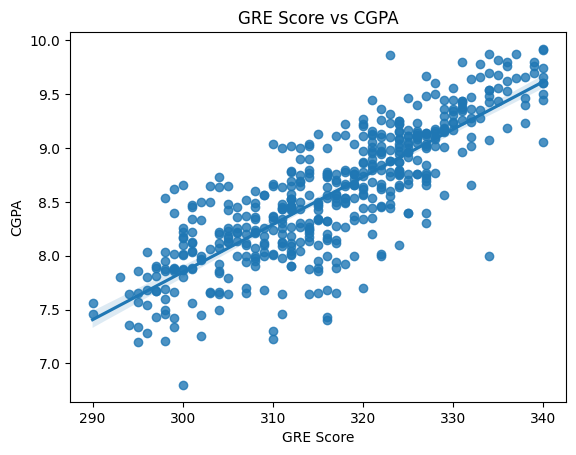

In [ ]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

fig = sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

plt.show()

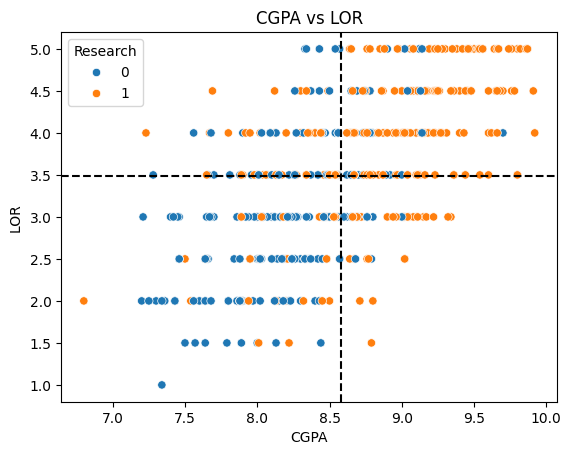

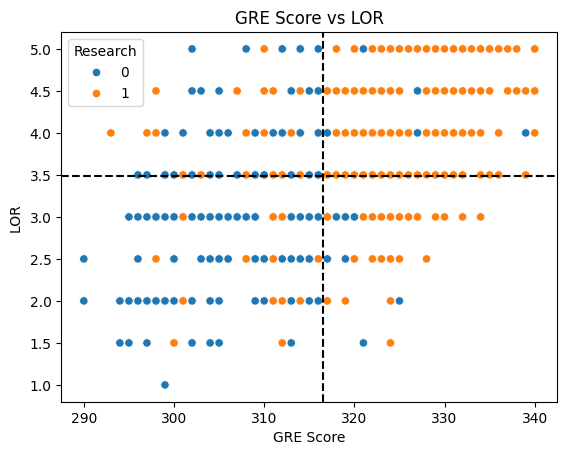

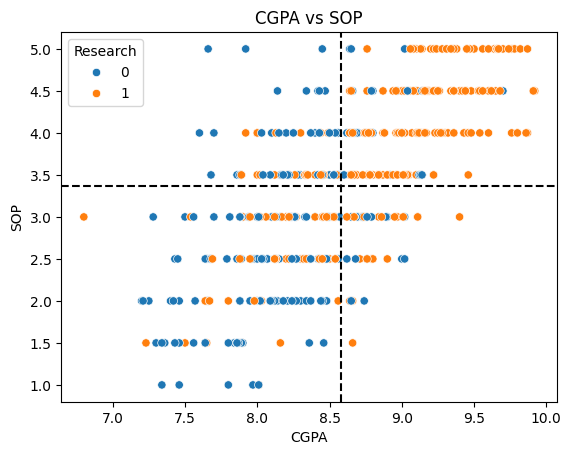

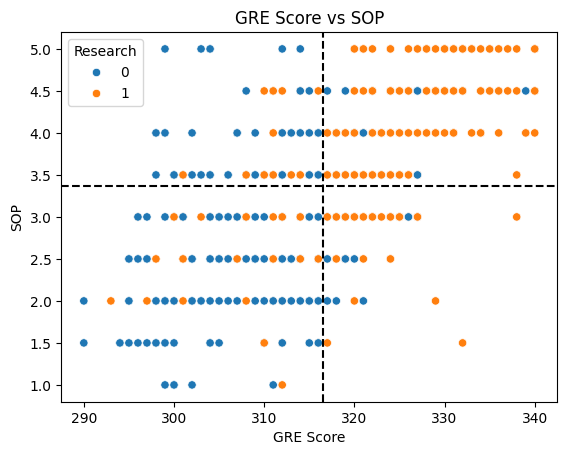

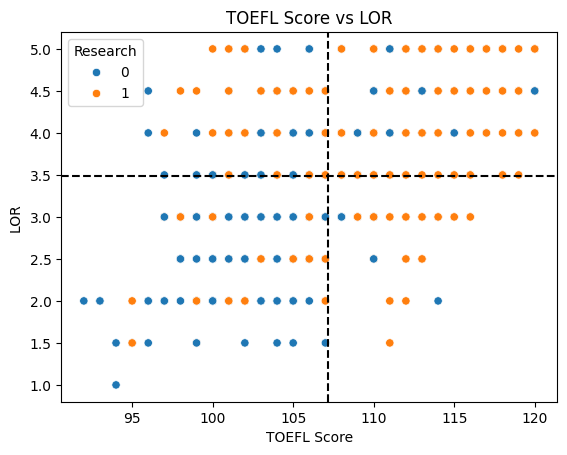

In [ ]:
fig = sns.scatterplot(x="CGPA", y="LOR ", data=df, hue="Research")
plt.axvline(x=df["CGPA"].mean(), color='black', linestyle='--')  # Vertical line at x-axis center
plt.axhline(y=df["LOR "].mean(), color='black', linestyle='--')  # Horizontal line at y-axis center
plt.title("CGPA vs LOR")
plt.show()

fig = sns.scatterplot(x="GRE Score", y="LOR ", data=df, hue="Research")
plt.axvline(x=df["GRE Score"].mean(), color='black', linestyle='--')  # Vertical line at x-axis center
plt.axhline(y=df["LOR "].mean(), color='black', linestyle='--')  # Horizontal line at y-axis center
plt.title("GRE Score vs LOR")
plt.show()

fig = sns.scatterplot(x="CGPA", y="SOP", data=df, hue="Research")
plt.axvline(x=df["CGPA"].mean(), color='black', linestyle='--')  # Vertical line at x-axis center
plt.axhline(y=df["SOP"].mean(), color='black', linestyle='--')  # Horizontal line at y-axis center
plt.title("CGPA vs SOP")
plt.show()

fig = sns.scatterplot(x="GRE Score", y="SOP", data=df, hue="Research")
plt.axvline(x=df["GRE Score"].mean(), color='black', linestyle='--')  # Vertical line at x-axis center
plt.axhline(y=df["SOP"].mean(), color='black', linestyle='--')  # Horizontal line at y-axis center
plt.title("GRE Score vs SOP")
plt.show()

fig = sns.scatterplot(x= "TOEFL Score", y="LOR ", data=df, hue="Research")
plt.axvline(x=df["TOEFL Score"].mean(), color='black', linestyle='--')  # Vertical line at x-axis center
plt.axhline(y=df["LOR "].mean(), color='black', linestyle='--')  # Horizontal line at y-axis center
plt.title("TOEFL Score vs LOR")
plt.show()


plt.show()

Insights:
- Candidates who have done Research are mainly the one who also are having better score at CGPA, TOEFL, GRE Score.

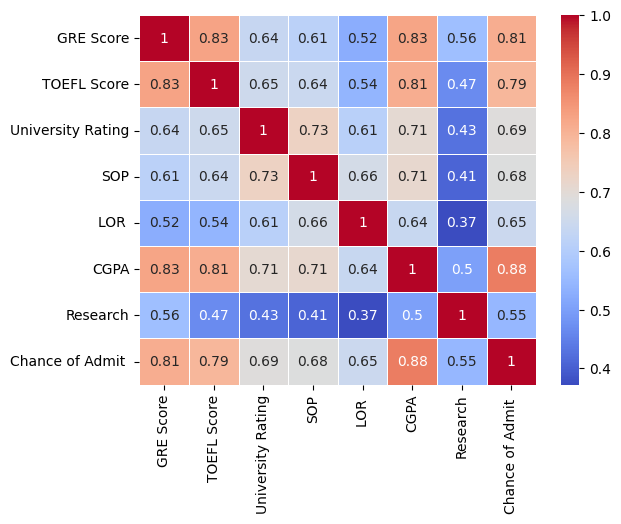

In [ ]:
corr = df.corr()
sns.heatmap(corr, linewidths=.5, annot=True, cmap="coolwarm")
plt.show()

# Linear Model Using Sklearn

In [ ]:
from sklearn.model_selection import train_test_split
# Dividing the Columns into Y - Target and the remaining into X
X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']

In [ ]:
# Dividing the data(random rows) into training - 80%  and test - 20 %, and fixing random state(seed)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 5)

In [ ]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
247,311,104,2,2.5,3.5,8.48,0
390,314,102,2,2.0,2.5,8.24,0
186,317,107,3,3.5,3.0,8.68,1
484,317,106,3,3.5,3.0,7.89,1
139,318,109,1,3.5,3.5,9.12,0


In [ ]:
y_train.head()

,Chance of Admit
247,0.71
390,0.64
186,0.84
484,0.73
139,0.78


In [ ]:
#Standardization
from sklearn.preprocessing import StandardScaler
# Seperating the column from the data
X_train_columns=X_train.columns
std=StandardScaler()
X_train_std=std.fit_transform(X_train)

In [ ]:
X_train_std[:3]

array([[-0.47784373, -0.50768097, -0.95667111, -0.88500096,  0.01211887,
        -0.16100822, -1.14548624],
       [-0.21311036, -0.83868731, -0.95667111, -1.3885577 , -1.06511437,
        -0.55511299, -1.14548624],
       [ 0.05162301, -0.01117146, -0.10250048,  0.12211251, -0.52649775,
         0.16741242,  0.87299172]])

In [ ]:
# Again placing the data now to the standadized data
X_train=pd.DataFrame(X_train_std, columns=X_train_columns)

In [ ]:
X_train.head()

,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.0,-0.477844,-0.507681,-0.956671,-0.885001,0.012119,-0.161008,-1.145486
1,1.0,-0.213110,-0.838687,-0.956671,-1.388558,-1.065114,-0.555113,-1.145486
2,1.0,0.051623,-0.011171,-0.102500,0.122113,-0.526498,0.167412,0.872992
3,1.0,0.051623,-0.176675,-0.102500,0.122113,-0.526498,-1.129849,0.872992
4,1.0,0.139867,0.319835,-1.810842,0.122113,0.012119,0.889938,-1.145486


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error
models = [
 ['Linear Regression :', LinearRegression()],

 ['Lasso Regression :', Lasso(alpha=0.1)], #try with different
 ['Ridge Regression :', Ridge(alpha=1.0)] #try with different
 ]
print("Results without removing features with multicollinearity ...")
for name,model in models:
 model.fit(X_train, y_train.values)
 predictions = model.predict(std.transform(X_test))
 print(name, (np.sqrt(mean_squared_error(y_test, predictions))))


Results without removing features with multicollinearity ...
Linear Regression : 0.05402776501782379
Lasso Regression : 0.10607984165211697
Ridge Regression : 0.05396014487697367


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [ ]:
import statsmodels.api as sm
# Adding constant for the OLS model
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train.values, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.1
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          3.16e-142
Time:                        09:22:10   Log-Likelihood:                 551.78
No. Observations:                 400   AIC:                            -1088.
Df Residuals:                     392   BIC:                            -1056.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7197      0.00

In [ ]:
# Since the p value of SOP is the highest also above .05, we can remove that feature
X_train_new=X_train.drop(columns='SOP')

In [ ]:
model1 = sm.OLS(y_train.values, X_train_new).fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     300.7
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          1.76e-143
Time:                        09:22:26   Log-Likelihood:                 551.77
No. Observations:                 400   AIC:                            -1090.
Df Residuals:                     393   BIC:                            -1062.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7197      0.00

# VIF(Variance Inflation Factor)

* “ VIF score of an independent variable represents how well the variable is explained by other independent variables.
* So, the closer the R^2 value to 1, the higher the value of VIF and the higher the multicollinearity with the particular independent variable.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)


In [ ]:
vif = pd.DataFrame()
X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)
vif['Features'] = X_t.columns

In [ ]:
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Features,VIF
6,CGPA,4.99
1,GRE Score,4.55
2,TOEFL Score,3.97
4,SOP,2.93
3,University Rating,2.90
5,LOR,2.00
7,Research,1.50
0,const,NaN


Since none of the VIF score is above we need not to make any changes

In [ ]:
# If either the VIF score has not reached its threshhold (vif_thr = 5) or r2
# score reaches its threshhold(r2_thr = 0.85),
# we continue to remove the feature using VIF by using the following code.

In [ ]:
# #Removing the variable with highest VIF]
# cols2 = vif["Features"][1:].values
# vif_thr = 5
# r2_thr = 0.80
# i = 1
# feats_removed = ['year']
# while True:
#   vif = pd.DataFrame()
#   X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]
#   vif['Features'] = cols2
#   vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
#   vif['VIF'] = round(vif['VIF'], 2)
#   vif = vif.sort_values(by = "VIF", ascending = False)

#   cols2 = vif["Features"][1:].values
#   X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]

#   X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
#   sm_model = sm.OLS(list(y_train), X2_sm).fit()
#   if (vif.iloc[0]['VIF'] < vif_thr) or (sm_model.rsquared_adj < r2_thr):
#     print('Reached threshold')
#     print('Highest vif:',vif.iloc[0])
#     print('Current adj.R2',sm_model.rsquared_adj)
#     print('Features removed:', i)
#     print('List of features removed:', feats_removed)
#     break
#   feats_removed.append(vif.iloc[0]['Features'])
#   i += 1

In [ ]:
# Setting test data for the test

X_test_std= std.transform(X_test)

In [ ]:
X_test=pd.DataFrame(X_test_std, columns=X_train_columns)

In [ ]:
X_test = sm.add_constant(X_test)

In [ ]:
X_test_del=list(set(X_test.columns).difference(set(X_train_new.columns)))

In [ ]:
print(f'Dropping {X_test_del} from test set')

Dropping ['SOP'] from test set


In [ ]:
X_test_new=X_test.drop(columns=X_test_del)

In [ ]:
# Prediction from the clean model
pred = model1.predict(X_test_new)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Evaluation metrics
print('Mean Absolute Error:', mean_absolute_error(y_test.values, pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test.values, pred)))
print('R-squared Score:', r2_score(y_test.values, pred))
print('Adjusted R-squared:', 1 - (1 - r2_score(y_test.values, pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))


Mean Absolute Error: 0.04170290194599415
Root Mean Square Error: 0.05399320512337096
R-squared Score: 0.8217070526314056
Adjusted R-squared: 0.8060329473682325


Insights:
- The Mean Absolute Error (MAE) and Root Mean Square Error (RMSE) are low, indicating the model’s predictions are close to the actual values.
- The R-squared (0.82) and Adjusted R-squared (0.81) scores show that the model explains a significant proportion of variance in the dependent variable.

# Mean Of Residuals

In [ ]:
residuals = y_test.values-pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 0.007974857806063695


# Test for Homoscedasticity

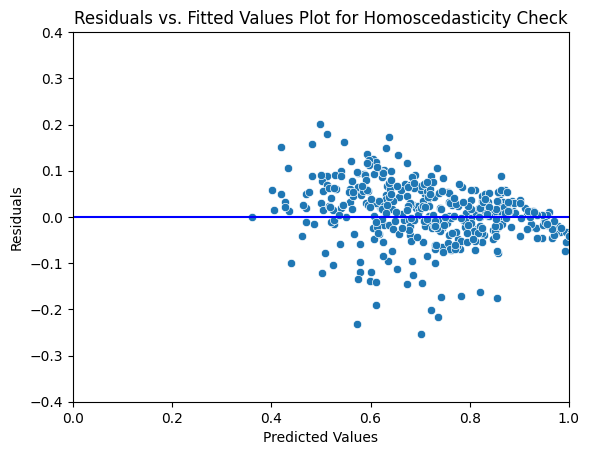

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for residuals vs. predicted values
p = sns.scatterplot(x=pred, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.ylim(-0.4, 0.4)
plt.xlim(0, 1)

# Line for y=0 to check homoscedasticity
sns.lineplot(x=[0, 1], y=[0, 0], color='blue')

# Title for the plot
plt.title('Residuals vs. Fitted Values Plot for Homoscedasticity Check')

plt.show()

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_test)
lzip(name, test)

[('F statistic', 0.9149665889184606), ('p-value', 0.7306538007262778)]

The Data is Homoscedasticity
- F-statistic (0.91): The F-statistic value is relatively low, suggesting that there is not a strong evidence of differing variances across the groups.
- p-value (0.73): The p-value is much greater than the commonly used significance level of 0.05, indicating that we fail to reject the null hypothesis. This suggests that there is no evidence of heteroscedasticity in the model.

# Normality of residuals

<ipython-input-49-399e0398f458>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(residuals,kde=True)


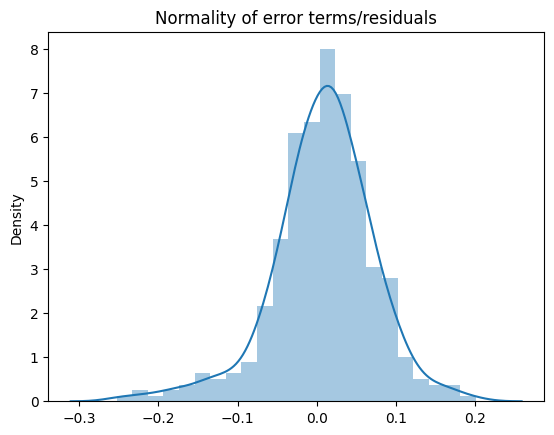

In [ ]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

Text(0, 0.5, 'y_pred')

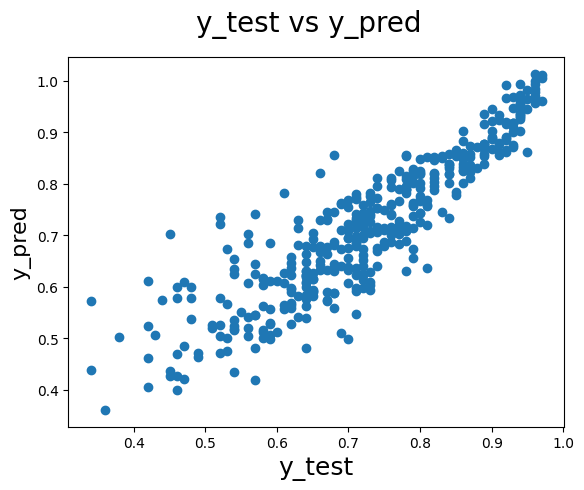

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test.values, pred)
fig.suptitle('y_test vs y_pred', fontsize=20) # Plot head
plt.xlabel('y_test', fontsize=18) # X-label
plt.ylabel('y_pred', fontsize=16) # Y-label

Linear Relationship: The plot indicates a positive linear relationship between the actual values and predicted values, suggesting that the model is performing well in predicting the dependent variable


# Insights and Recommendations
1. *Bias-Variance Tradeoff*

Insight: Bias arises when the model makes overly simplistic assumptions about the data, leading to underfitting, while variance arises when the model becomes too complex, leading to overfitting. The goal is to strike a balance between the two, with a model that has both low bias and low variance. <br>
Recommendation: Regularly evaluate model performance to ensure a balance between bias and variance. Utilize model selection criteria (like cross-validation) to fine-tune this tradeoff.

2. *Dimensionality Reduction and Feature Selection*

Insight: Dimensionality reduction and feature selection help in decreasing variance by simplifying models, reducing overfitting, and improving model generalization. <br>
Recommendation: Apply techniques like PCA (Principal Component Analysis) or Lasso (for feature selection) to remove irrelevant or redundant features and reduce model complexity.

3. *Larger Training Sets Reduce Variance*

Insight: Larger datasets generally help in reducing model variance, as the model gets more data to learn from, resulting in better generalization. <br>
Recommendation: Aim to increase the size and diversity of the training dataset where possible. This can be achieved through data augmentation, gathering more data, or using synthetic data generation techniques.

4. *Reducing Bias Through Model Changes and Data Representation*

Insight: Bias can be reduced by changing the model (e.g., using more complex models), ensuring that the data is truly representative of the problem space, and using parameter tuning. <br>
Recommendation: Consider switching to more flexible models (e.g., moving from linear regression to non-linear models) and ensure that the dataset captures a wide range of scenarios and groups.

5. *Regularization to Balance Bias and Variance*

Insight: Regularization methods like Lasso and Ridge regression introduce controlled bias, which reduces variance and improves model stability and performance. While OLS regression is unbiased, regularization techniques result in lower MSE by reducing overfitting. <br>
Recommendation: Regularize models using Ridge or Lasso when variance is too high. Use cross-validation to select the optimal regularization parameter (alpha) to ensure that the model achieves the best bias-variance tradeoff.

6. *Model Complexity and Overfitting*

Insight: More complex models tend to overfit the training data, leading to high variance. Simpler models, while they may have higher bias, are less likely to overfit. <br>
Recommendation: Regularly evaluate model complexity through techniques such as cross-validation or learning curves to detect overfitting early and adjust model complexity accordingly.

7. *Enhanced Model Performance Through Regularized Linear Models*

Insight: Linear models and generalized linear models can be regularized to decrease variance. Regularization adds a penalty term to the cost function, which helps to prevent overfitting and increases model robustness. <br>
Recommendation: For linear regression tasks, always consider using regularized models (e.g., Ridge, Lasso) for better predictive performance, especially when dealing with high-dimensional datasets.